<a href="https://colab.research.google.com/github/ggruszczynski/gpu_colab/blob/main/example40_parallel_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parallel reduction

In this exercice a parallel reduction kernel will be implemented. Write a kernel performing the sum operation.

Starting point:

In [ ]:
%% file parallel_reduction.cu

#include <stdio.h>

void cpu_sum(int *x, int n)
{
    int result = 0;
    for(unsigned int i=0; i < n; ++i) {
        result += x[i];
    }
    printf("CPU Sum is %d \n", result);
}

__global__ void gpu_sum(int *x)
{
    int tid = blockIdx.x * blockDim.x + threadIdx.x;  

    // write your code here
    // tip: use `__syncthreads()` to synchronize the threads 
}

int main()
{
    int h[] = {10, 1, 8, -1, 0, -2, 3, 5, -2, -3, 2, 7, 0, 11, 0, 2};

    int size = sizeof(h);
    int count = size/sizeof(int);

    int* d;
    cudaMalloc(&d, size);
    cudaMemcpy(d, h, size, cudaMemcpyHostToDevice);

    gpu_sum <<<1, count >>>(d);

    int result;
    cudaMemcpy(&result, d, sizeof(int), cudaMemcpyDeviceToHost);
    printf("GPU Sum is %d \n", result);

    //cpu_sum(h, count);
    cudaFree(d);
    return 0;
}

In [ ]:
!nvidia-smi

In [ ]:
%%bash

CUDA_SUFF=35
nvcc -gencode arch=compute_${CUDA_SUFF},code=sm_${CUDA_SUFF} ./parallel_reduction.cu -o parallel_reduction
./parallel_reduction

The algorithm can be implemented in two ways:

Naive memory access (interleaved addresing):

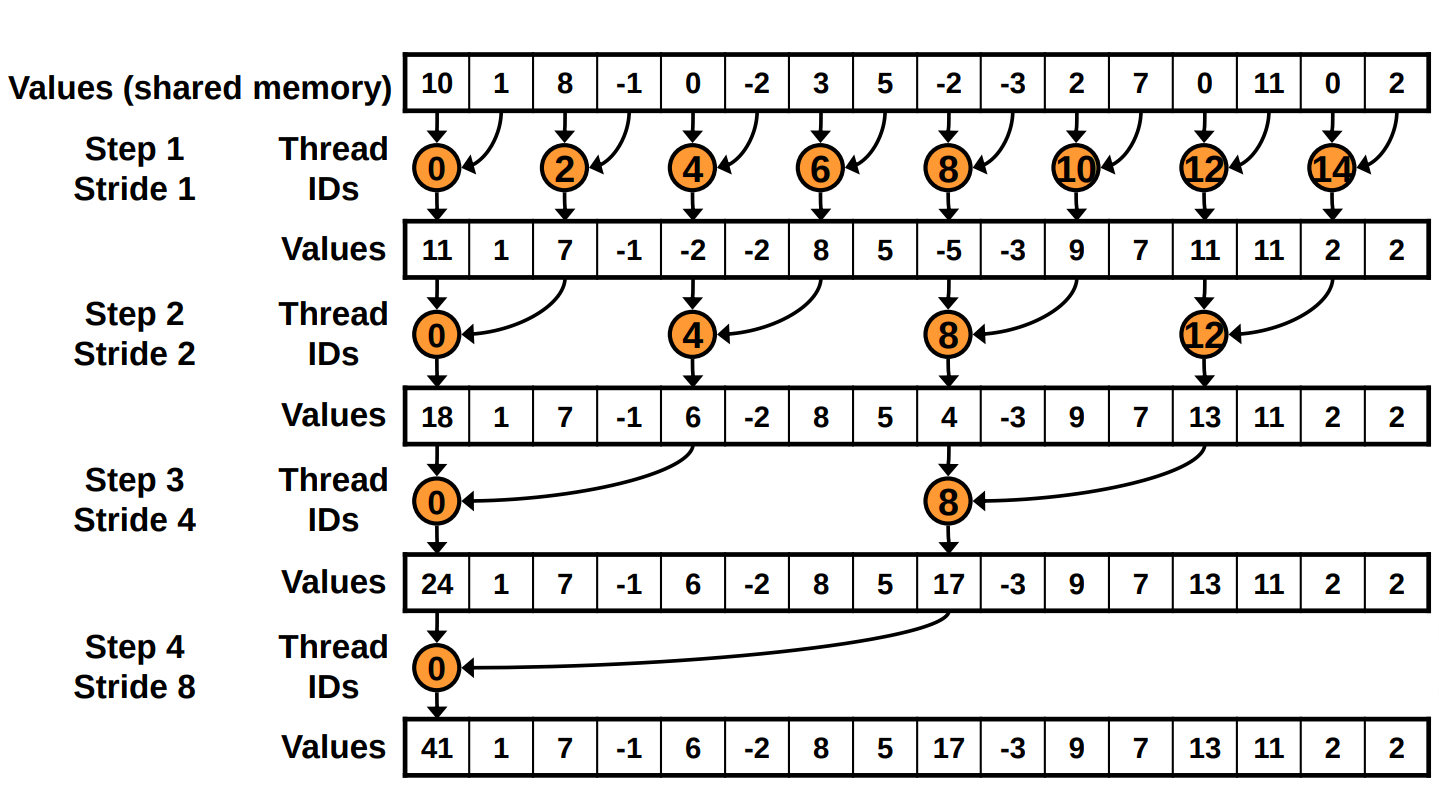

Optimised memory access (sequantial addresing):

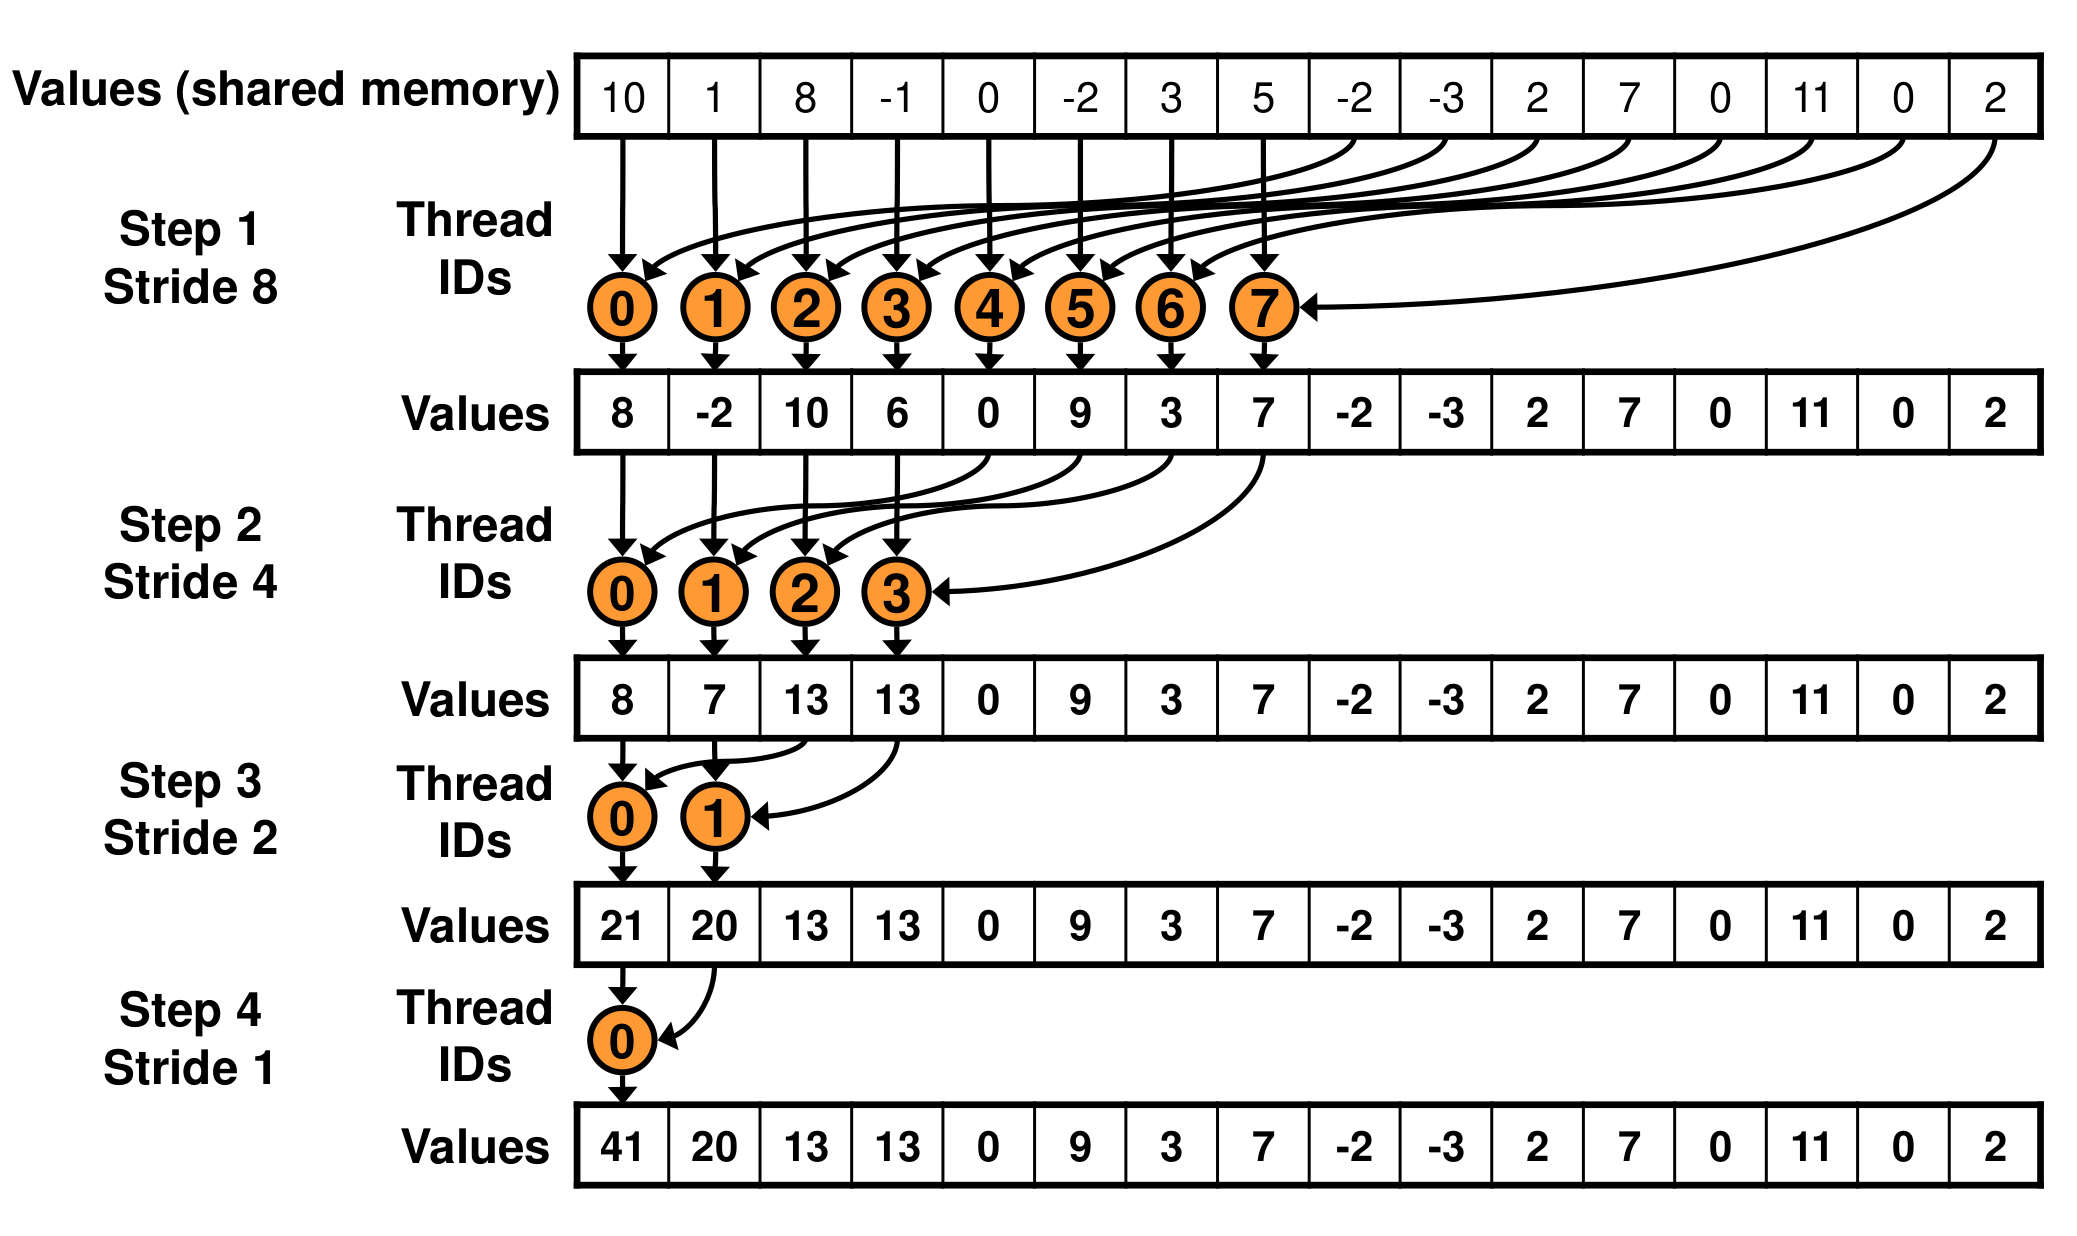